# ZMS Lab 03 - Case PITU


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kiedy-ruina-=-RUINA-?" data-toc-modified-id="Kiedy-ruina-=-RUINA-?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kiedy ruina = RUINA ?</a></span></li><li><span><a href="#Rozwiązanie" data-toc-modified-id="Rozwiązanie-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Rozwiązanie</a></span></li><li><span><a href="#Dane---rozkłady,-wyznaczanie-parametrów" data-toc-modified-id="Dane---rozkłady,-wyznaczanie-parametrów-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dane - rozkłady, wyznaczanie parametrów</a></span><ul class="toc-item"><li><span><a href="#Liczba-szkód" data-toc-modified-id="Liczba-szkód-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Liczba szkód</a></span></li><li><span><a href="#Wielkość-szkód" data-toc-modified-id="Wielkość-szkód-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Wielkość szkód</a></span></li></ul></li><li><span><a href="#Model-symulacji" data-toc-modified-id="Model-symulacji-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model symulacji</a></span><ul class="toc-item"><li><span><a href="#Funkcja-wywołująca-symulację-n-razy" data-toc-modified-id="Funkcja-wywołująca-symulację-n-razy-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Funkcja wywołująca symulację <em>n</em> razy</a></span></li></ul></li><li><span><a href="#Przeprowadzenie-symulacji" data-toc-modified-id="Przeprowadzenie-symulacji-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Przeprowadzenie symulacji</a></span></li><li><span><a href="#Raport" data-toc-modified-id="Raport-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Raport</a></span><ul class="toc-item"><li><span><a href="#Zbadaj-płynność-firmy-w-zależności-od-parametrów" data-toc-modified-id="Zbadaj-płynność-firmy-w-zależności-od-parametrów-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Zbadaj płynność firmy w zależności od parametrów</a></span></li></ul></li></ul></div>


## Kiedy ruina = RUINA ?

*opr. P. Wojewnik na podstawie:*

*„Optymalizacja portfela szkód” K. Saduś, M. Kwiecień, R. Lipiński* oraz *„Ubezpieczenia komunikacyjne firmy ABC” A. Kołota, M. Mączyńska*


Prezes zarządu zakładu ubezpieczeń PiTU S.A., Marcin R., zasłyszał, że Prezydent planuje naturalizować wszystkich chętnych z Dżydżykistanu. *No to teraz się zacznie*, pomyślał, *Dżydżykowie jeżdżą jak wariaci, wzrośnie szkodowość, a więc musimy podnieść dla nich ceny.* 

Marcin R. dzwoni do aktuariuszki – Aldony P., ale tu czeka go niespodzianka. *Mój synek zachorował... Grypa to nic wielkiego... Ale w świńskim wydaniu bywa niebezpieczna.* Marcin z bólem serca odsyła Aldonę do domu, a zlecenie dostaje Marek T., asystent Aldony. Pytanie brzmi: **czy składka 500 zł jest wystarczająca ?**

Dotychczasowe doświadczenia PiTU S.A. z Dżydżykami są następujące:

<table>
<tr></tr>
<tr><td>

| Liczba szkód    | Liczba polis
|-----------------|-------------
| 0               | 3 437
| 1               | 522
| 2               | 40
| 3               | 2
| 4               | 0
| 5               | 0

</td><td>

| Wielkość szkody | Liczba szkód
|-----------------|-------------
| -               | 0
| 100             | 0
| 200             | 2
| 500             | 27
| 1 000           | 52
| 2 000           | 115
| 5 000           | 203
| 10 000          | 106
| 20 000          | 42
| 40 000          | 14
| 50 000          | 0
| 55 000          | 0
| 60 000          | 1

</td></tr> </table>

Aldona rzuciła jeszcze przez telefon, że **liczbę szkód dobrze opisuje rozkład Poissona**, natomiast **wielkość szkód – rozkład log-normalny**. Z Marcina udało się wydusić **oczekiwaną liczbę klientów – 100** – oraz **aktualną nadwyżkę 10 000**.


**Pytania:**
1.	Jaką ustalić składkę OC, aby ruina kierowców nie była udziałem PiTU S.A.?
2.	Czy nadwyżka końcowa będzie równa początkowej?
3.	Jakie jest zagrożenie ruiną?
4.	Jaka powinna być nadwyżka i składka, żeby prawdopodobieństwo ruiny było mniejsze niż 1%?


## Rozwiązanie

In [19]:
import csv
import scipy as sc
import numpy as np
from math import exp, factorial
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import kstest
plt.style.use('seaborn-whitegrid')
import pandas as pd

## Dane - rozkłady, wyznaczanie parametrów

### Liczba szkód

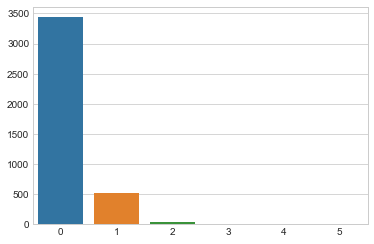

In [20]:
liczba_szkod = {0: 3437,
                1: 522,
                2: 40,
                3: 2,
                4: 0,
                5: 0}

sns.barplot(x=list(liczba_szkod.keys()),
            y=list(liczba_szkod.values()));
# or plt.bar(*zip(*liczba_szkod.items()))

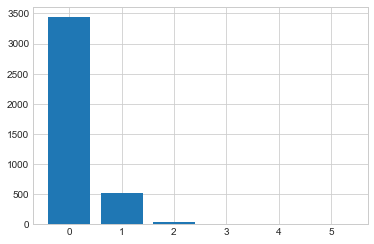

In [21]:
# Średnia liczba szkód
liczba_polis = sum(liczba_szkod.values())
srednia_liczba_szkod = (sum([x * y for x, y in liczba_szkod.items()]) /
                        liczba_polis)

# Czy liczba szkód ma faktycznie rozkład Poissona?
poisson_test = [sc.stats.poisson.pmf(i, srednia_liczba_szkod) *
                liczba_polis for i in range(len(liczba_szkod))]

plt.bar(list(liczba_szkod.keys()), poisson_test)
plt.show()

In [22]:
liczba_polis

4001

In [23]:
srednia_liczba_szkod

0.1519620094976256

Funkcja rozkładu prawdopodobieństwa w rozkładzie Poissona ze średnią $\lambda$
$$f(k,\lambda)=\frac{\lambda^ke^{-\lambda}}{k!}$$

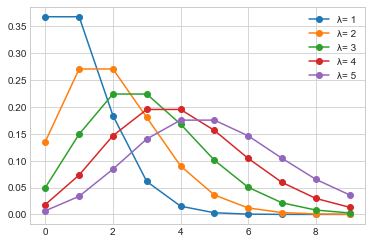

In [24]:
# Rozkład Poissona
for λ in [1, 2, 3, 4, 5]:
    plt.plot([λ**k*exp(-λ)/factorial(k)
              for k in range(10)], 'o-', label='λ= {}'.format(λ))
plt.legend();

In [25]:
# Test chi-kwadrat z biblioteki scipy pomoże odpowiedziec na pytanie
test1 = sc.stats.chisquare(list(liczba_szkod.values()), f_exp=poisson_test)
if test1[1] > 0.05:
    print("Brak podstaw do odrzucenia hipotezy zerowej")
else:
    print("Należy odrzucic hipoteze zerowa")

Brak podstaw do odrzucenia hipotezy zerowej


### Wielkość szkód

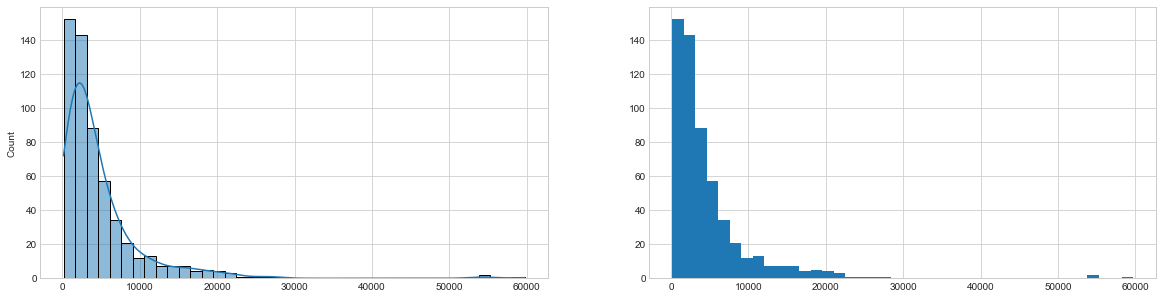

Średnia wielkość szkód: 4742


In [26]:
szkody = []
with open('../data/data_asm/szkody.txt', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=";")
    for row in reader:
        szkody.append(int(row[1]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])
sns.histplot(szkody, bins=40, kde=True, ax=ax1)
ax2 = plt.hist(szkody, bins=40)
plt.show()

print("Średnia wielkość szkód:", round(np.mean(szkody)))

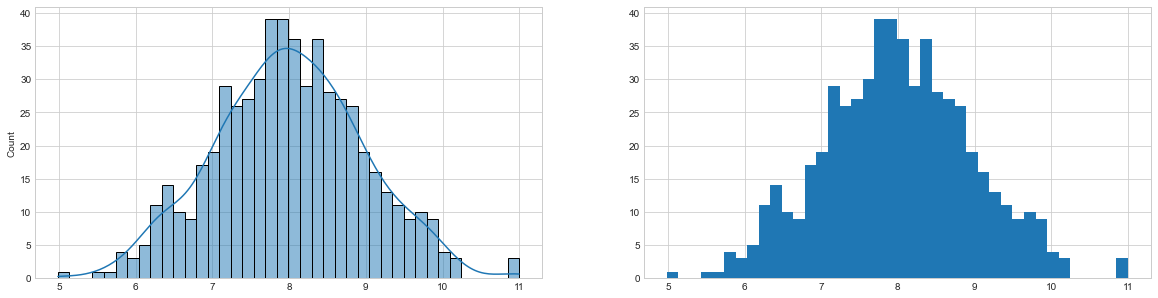

In [27]:
# Wielkość szkód ma rozkład log-normalny
szkody_ln = np.log(szkody)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])
sns.histplot(szkody_ln, bins=40, kde=True,ax=ax1)
ax2 = plt.hist(szkody_ln, bins=40)
plt.show()

In [28]:
# ... czy faktycznie? test K-S
test2 = kstest(szkody_ln, sc.stats.norm.cdf,
               args=(np.mean(szkody_ln), np.std(szkody_ln)))
if test2[1] > 0.05:
    print("p-value wyniosło:", round(test2[1], 4),
          "- brak więc podstaw do odrzucenia hipotezy " +
          "o log-normalności rozkładu zmiennej")
else:
    print("należy odrzucic hipotezę zerowa")

p-value wyniosło: 0.9974 - brak więc podstaw do odrzucenia hipotezy o log-normalności rozkładu zmiennej


In [29]:
# Parametry wielkości szkód potrzebne do symulacji
SR_SZKODA_LN = np.mean(szkody_ln)
STD_SZKODA_LN = np.std(szkody_ln)

## Model symulacji

In [30]:
def model(liczba_klientow, srednia_liczba_szkod,
          sr_szkoda_ln, std_szkoda_ln, horyzont,
          nadwyzka, skladka, seed=-1):

    seed == -1 or sc.random.seed(seed)

    # Definiujemy daty umów klientow w symulacji
    daty_umow = [sc.random.randint(0, 364) for i in range(liczba_klientow)]
    kalendarz_wplat = [0]*365
    for dataUmowy in daty_umow:
        kalendarz_wplat[dataUmowy] += 1

    # Liczymy liczbę szkód przypadających na jednego klienta
    liczba_szkod_klienta = sc.random.poisson(srednia_liczba_szkod,
                                             liczba_klientow)

    # i ustalamy daty wyplaty dla wszystkich polis
    kalendarz_wyplat = [0]*(365*horyzont)
    for k in range(liczba_klientow):
        for s in range(liczba_szkod_klienta[k]):
            data_wyplaty = sc.random.randint(daty_umow[k], horyzont*365)
            kalendarz_wyplat[data_wyplaty] += 1

    # Analiza wyników firmy dla danego horyzontu czasowego i danych szkód:
    for dzien in range(365*horyzont):
        if dzien <= 364:
            nadwyzka += kalendarz_wplat[dzien] * skladka
        liczba_wyplat = kalendarz_wyplat[dzien]
        odszkodowania = 0
        if liczba_wyplat > 0:
            odszkodowania = sum(np.exp(sc.random.normal(sr_szkoda_ln,
                                                           std_szkoda_ln,
                                                           liczba_wyplat)))
        if nadwyzka < odszkodowania:
            return nadwyzka - odszkodowania
        
        nadwyzka -= odszkodowania
        
    return nadwyzka

### Funkcja wywołująca symulację *n* razy

In [31]:
def wywolanie(nadwyzka, skladka, liczba_powtorzen,
              liczba_klientow, srednia_liczba_szkod,
              sr_szkoda_ln, std_szkoda_ln, horyzont):
    wynik = []
    bankructwo = 0
    wynik_dodatni = []
    for seed in range(liczba_powtorzen):
        wynik.append(model(liczba_klientow, srednia_liczba_szkod,
                           sr_szkoda_ln, std_szkoda_ln, horyzont,
                           nadwyzka, skladka, seed))
        if wynik[seed] < 0:
            bankructwo += 1
        if wynik[seed] > 0:
            wynik_dodatni.append(wynik[seed])
    sredni_wynik = np.mean(wynik_dodatni)
    prawd_bankr = bankructwo / liczba_powtorzen
    return [bankructwo, prawd_bankr, sredni_wynik]

## Przeprowadzenie symulacji

In [32]:
# Zmienne i parametry w modelu:
sr_wynik = []  # Średni wynik finansowy firmy
wysokosc_skladki = []
prawd_bankr = []
liczba_ruin = []

LICZBA_POWTORZEN = 100
LICZBA_KLIENTOW = 100
HORYZONT = 2  # Długość obowiązywania umowy - zakładamy 2 lata

results = pd.DataFrame()

for nadwyzka in range(10000, 50000, 10000):
    prawd_bankr = []
    wysokosc_skladki = []
    for skladka in range(500, 1500, 100):
        wartosc_f_xy = wywolanie(nadwyzka, skladka,
                                 LICZBA_POWTORZEN, LICZBA_KLIENTOW,
                                 srednia_liczba_szkod, SR_SZKODA_LN,
                                 STD_SZKODA_LN, HORYZONT)
        wysokosc_skladki.append(skladka)
        liczba_ruin.append(wartosc_f_xy[0])
        prawd_bankr.append(wartosc_f_xy[1])
        sr_wynik.append(wartosc_f_xy[2])
        print("Nadwyżka: ", nadwyzka, "Składka: ", skladka,
              "Liczba ruin: ", wartosc_f_xy[0], "Średni wynik: ",
              round(wartosc_f_xy[2]), "Prawd_bankr: ", wartosc_f_xy[1])
        
    results[nadwyzka] = prawd_bankr
    results.index = wysokosc_skladki

Nadwyżka:  10000 Składka:  500 Liczba ruin:  66 Średni wynik:  12981 Prawd_bankr:  0.66
Nadwyżka:  10000 Składka:  600 Liczba ruin:  54 Średni wynik:  18284 Prawd_bankr:  0.54
Nadwyżka:  10000 Składka:  700 Liczba ruin:  39 Średni wynik:  22540 Prawd_bankr:  0.39
Nadwyżka:  10000 Składka:  800 Liczba ruin:  27 Średni wynik:  27950 Prawd_bankr:  0.27
Nadwyżka:  10000 Składka:  900 Liczba ruin:  21 Średni wynik:  35269 Prawd_bankr:  0.21
Nadwyżka:  10000 Składka:  1000 Liczba ruin:  16 Średni wynik:  42800 Prawd_bankr:  0.16
Nadwyżka:  10000 Składka:  1100 Liczba ruin:  6 Średni wynik:  47970 Prawd_bankr:  0.06
Nadwyżka:  10000 Składka:  1200 Liczba ruin:  3 Średni wynik:  56367 Prawd_bankr:  0.03
Nadwyżka:  10000 Składka:  1300 Liczba ruin:  1 Średni wynik:  65131 Prawd_bankr:  0.01
Nadwyżka:  10000 Składka:  1400 Liczba ruin:  0 Średni wynik:  74407 Prawd_bankr:  0.0
Nadwyżka:  20000 Składka:  500 Liczba ruin:  54 Średni wynik:  18284 Prawd_bankr:  0.54
Nadwyżka:  20000 Składka:  600 L

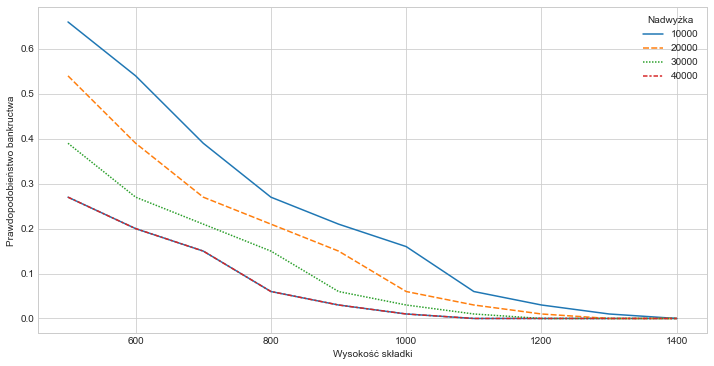

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(wysokosc_skladki, prawd_bankr)
plt.ylabel('Prawdopodobieństwo bankructwa')
plt.xlabel('Wysokość składki')
sns.lineplot(data=results);
plt.legend(title="Nadwyżka")
plt.show();

In [34]:
results

,10000,20000,30000,40000
500,0.66,0.54,0.39,0.27
600,0.54,0.39,0.27,0.20
700,0.39,0.27,0.21,0.15
800,0.27,0.21,0.15,0.06
900,0.21,0.15,0.06,0.03
1000,0.16,0.06,0.03,0.01
1100,0.06,0.03,0.01,0.00
1200,0.03,0.01,0.00,0.00
1300,0.01,0.00,0.00,0.00
1400,0.00,0.00,0.00,0.00


## Raport

### Zbadaj płynność firmy w zależności od parametrów

---
Pliki:
* **Wersja Jupyter** : 
    1. Notebook w formacie `.ipynb` 
    2. Plik `.html/.pdf` wygenerowany z notebooka
* **Wersja Word**: 
     1. Skrypt z kodem w formacie `.py` lub `.ipynb`, 
     2. Plik Worda w formacie`.docx`, 
     3. Inne pliki użyte w trakcie pracy np. `.xlsx`, 
     4. Plik `.pdf` wygnerowany z pliku Word

Pliki raportu proszę spakować do pliku `.zip` o nazwie __ZMS202021S_nazwisko1_nazwisko2_nazwisko3_nazwisko4.zip__ i wgrać na Moodle

Imiona i nazwiska oraz numery indeksu proszę podać również na stronie tytułowej raportu

Struktura raportu: http://moodle.szufel.pl/mod/page/view.php?id=61
(sekcja **Zawartość raportu**)

---
**Pytania**
1. Jaką ustalić składkę OC, aby prawdopodobieństwo ruiny było mniejsze niż 0,01? (analiza 1 parametru) ***1400***
2. Jaka powinna być nadwyżka i składka, żeby prawdopodobieństwo ruiny było mniejsze niż 0,01? (analiza 2 parametrów) ***10000 - 1400 ... 40000 - 1100***
3. Kiedy nadwyżka końcowa będzie równa początkowej? Oszacuj na podstawie modelu regresji. ***Horyzont - 2 lata, składka 400..420***
4. Jak liczba symulacji wpływa na wyniki?

---